# Análise exploratória

## Configurações iniciais

### Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Configurações de visualização

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

### Carregamento e limpeza dos dados

In [3]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")
df = df.dropna(subset=["CustomerID"])
df = df.drop_duplicates()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df = df.reset_index(drop=True)

### Visualização inicial dos dados

In [21]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue,MesAno,Hora
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalValue   401604 non-null  float64       
 9   MesAno       401604 non-null  period[M]     
 10  Hora         401604 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4), period[M](1)
memory usage: 32.2+ MB
None


In [23]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 11:58:30       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       250.283037                            NaN      69.764035   

          CustomerID     TotalValue           Hora  
count  401604.000000  401604.000000  401604.000000  
mean    15281.160818      20.613638      12.731031  
min     12346.000000 -168469.600000       6.000000  
25%     13939.000000       4.250000      11.000000  
50%     15145.000000      11.700000      13.000000  
75%     16784.000000      19.800000      14.000000 

## Cálculos e gráficos

### 1. Cálculo do Ticket Médio

In [5]:
df["TotalValue"] = df["Quantity"] * df["UnitPrice"]
ticket_medio = df.groupby("CustomerID")["TotalValue"].mean().mean()
ticket_medio

np.float64(28.868389374085748)

### 2. Top 10 produtos mais vendidos

C:\Users\Pedro\AppData\Local\Temp\ipykernel_12612\1987578016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette="crest")


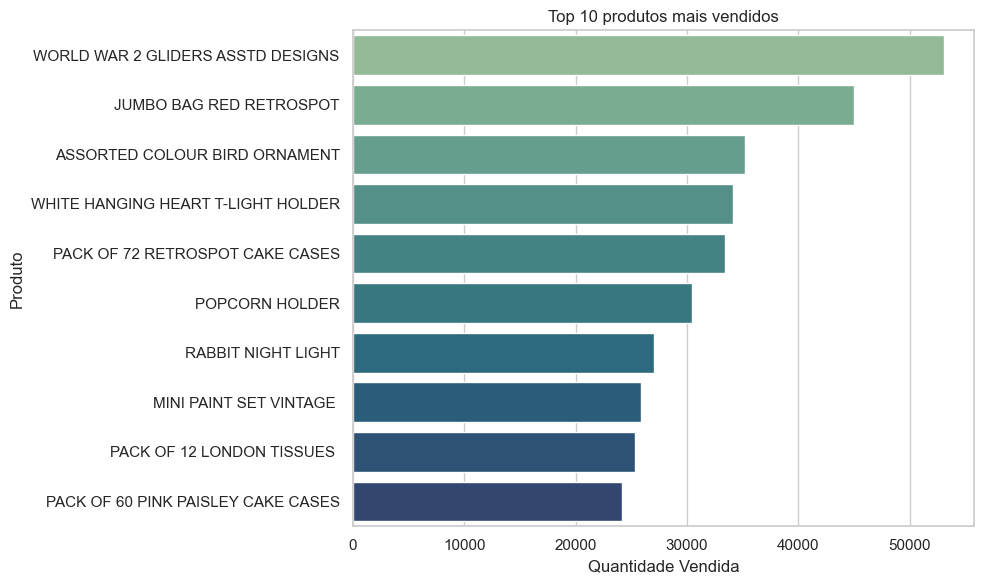

In [ ]:
top_produtos = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_produtos.values, y=top_produtos.index, palette="crest")
plt.title("Top 10 produtos mais vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.savefig("imagens/top_produtos_vendidos.png", dpi=300)
plt.show()

### 3. Cálculo das vendas por país

C:\Users\Pedro\AppData\Local\Temp\ipykernel_12612\1837458795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_pais.values, y=vendas_por_pais.index, palette="flare")


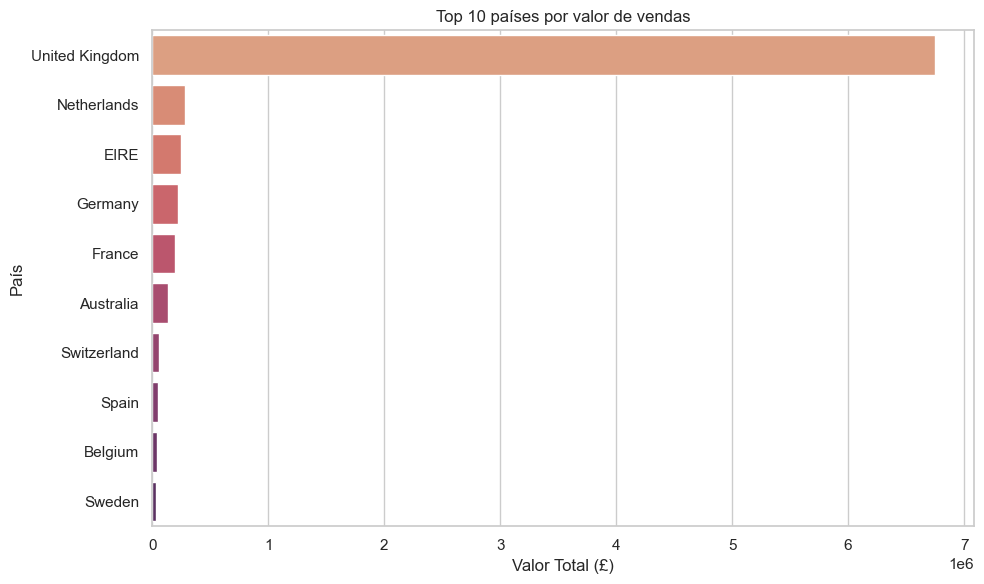

In [12]:
vendas_por_pais = df.groupby("Country")["TotalValue"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=vendas_por_pais.values, y=vendas_por_pais.index, palette="flare")
plt.title("Top 10 países por valor de vendas")
plt.xlabel("Valor Total (£)")
plt.ylabel("País")
plt.tight_layout()
plt.savefig("imagens/top_paises_valor_vendas.png", dpi=300)
plt.show()

### 4. Distribuição de valores de pedido

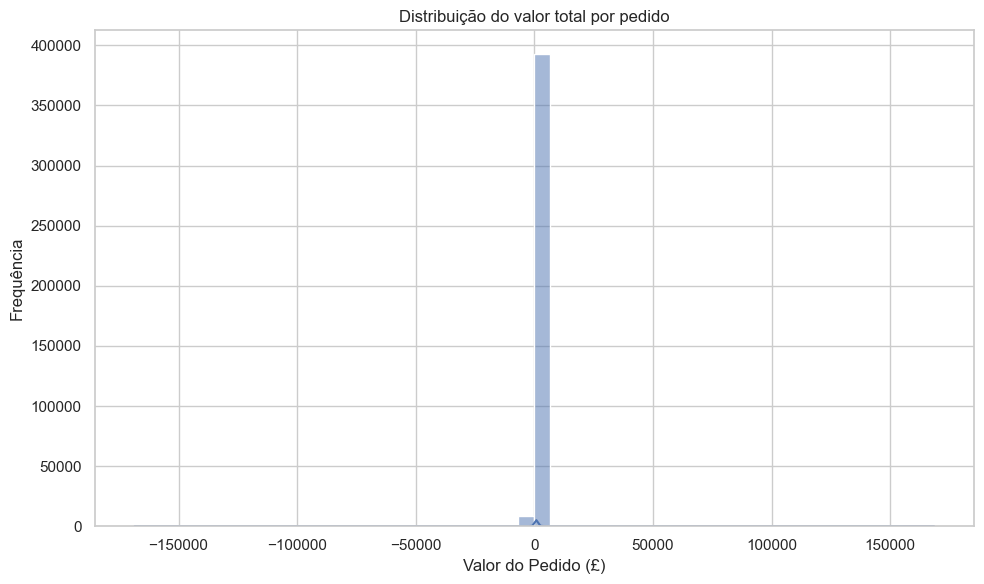

In [10]:
sns.histplot(df["TotalValue"], bins=50, kde=True, color="#4C72B0")
plt.title("Distribuição do valor total por pedido")
plt.xlabel("Valor do Pedido (£)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.savefig("imagens/distribuicao_valor_pedido.png", dpi=300)
plt.show()

### 5. Quantidade de vendas por mês

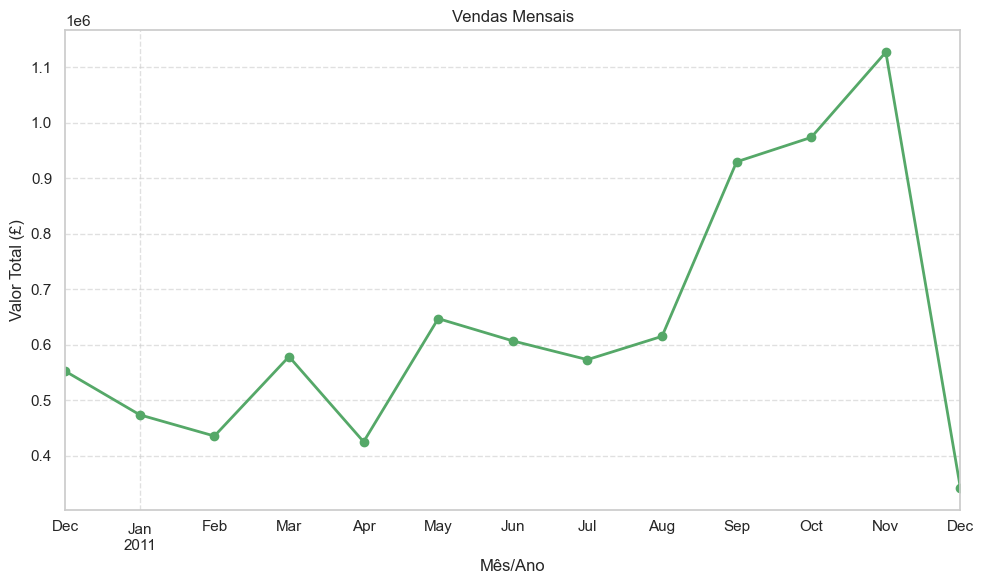

In [13]:
df["MesAno"] = df["InvoiceDate"].dt.to_period("M")
vendas_mensais = df.groupby("MesAno")["TotalValue"].sum()

vendas_mensais.plot(marker="o", color="#55A868", linewidth=2)
plt.title("Vendas Mensais")
plt.xlabel("Mês/Ano")
plt.ylabel("Valor Total (£)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("imagens/vendas_mensais.png", dpi=300)
plt.show()

### 6. Produtos mais lucrativos

C:\Users\Pedro\AppData\Local\Temp\ipykernel_12612\218974548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lucrativos.values, y=top_lucrativos.index, palette="viridis")


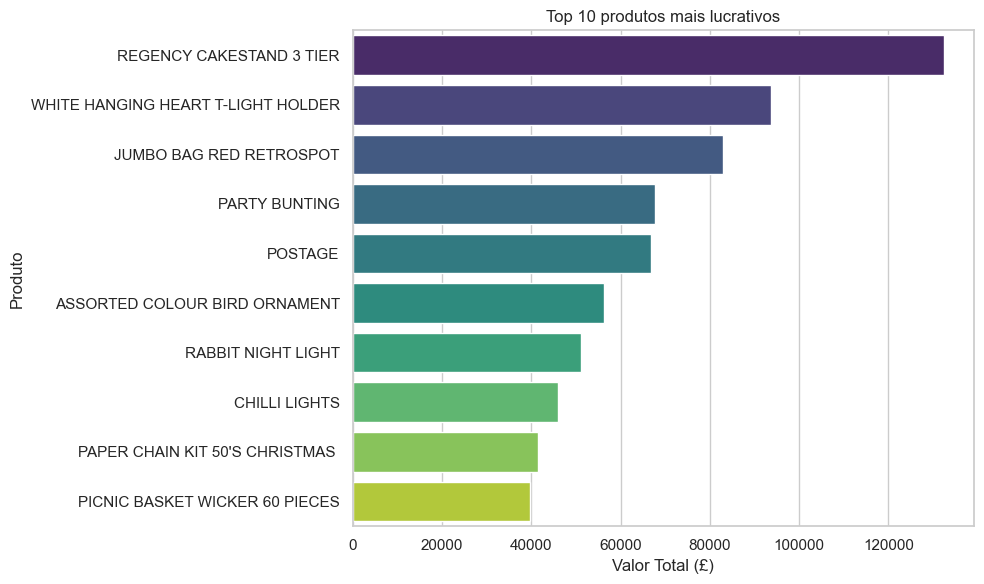

In [14]:
top_lucrativos = df.groupby("Description")["TotalValue"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_lucrativos.values, y=top_lucrativos.index, palette="viridis")
plt.title("Top 10 produtos mais lucrativos")
plt.xlabel("Valor Total (£)")
plt.ylabel("Produto")
plt.tight_layout()
plt.savefig("imagens/produtos_mais_lucrativos.png", dpi=300)
plt.show()

### 7. Horário com mais vendas

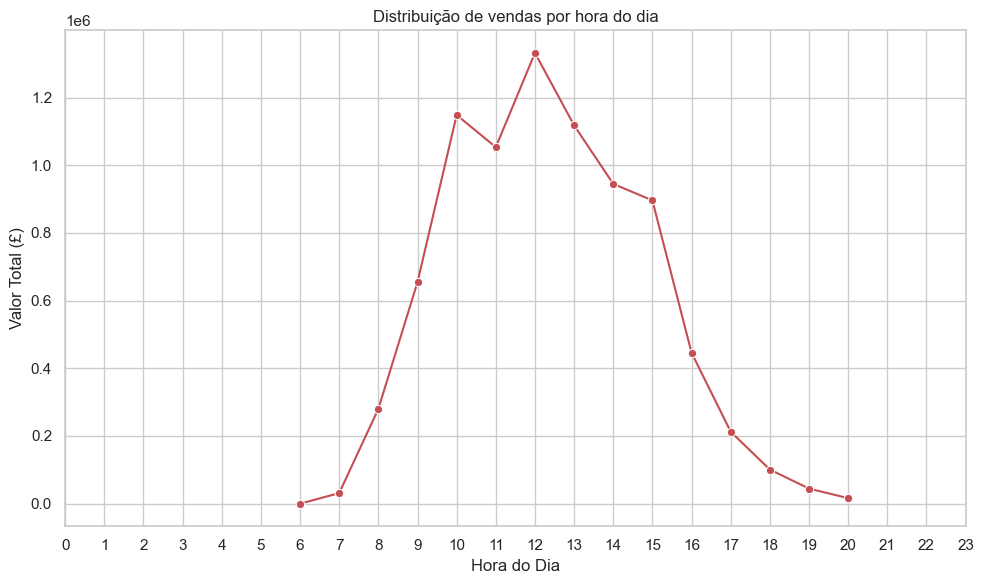

In [15]:
df["Hora"] = df["InvoiceDate"].dt.hour
vendas_por_hora = df.groupby("Hora")["TotalValue"].sum()

sns.lineplot(x=vendas_por_hora.index, y=vendas_por_hora.values, marker="o", color="#C44E52")
plt.title("Distribuição de vendas por hora do dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Valor Total (£)")
plt.xticks(range(0,24))
plt.tight_layout()
plt.savefig("imagens/vendas_por_hora.png", dpi=300)
plt.show()

### 8. Número de pedidos por país (Top 10)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_12612\2438036130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedidos_por_pais.values, y=pedidos_por_pais.index, palette="coolwarm")


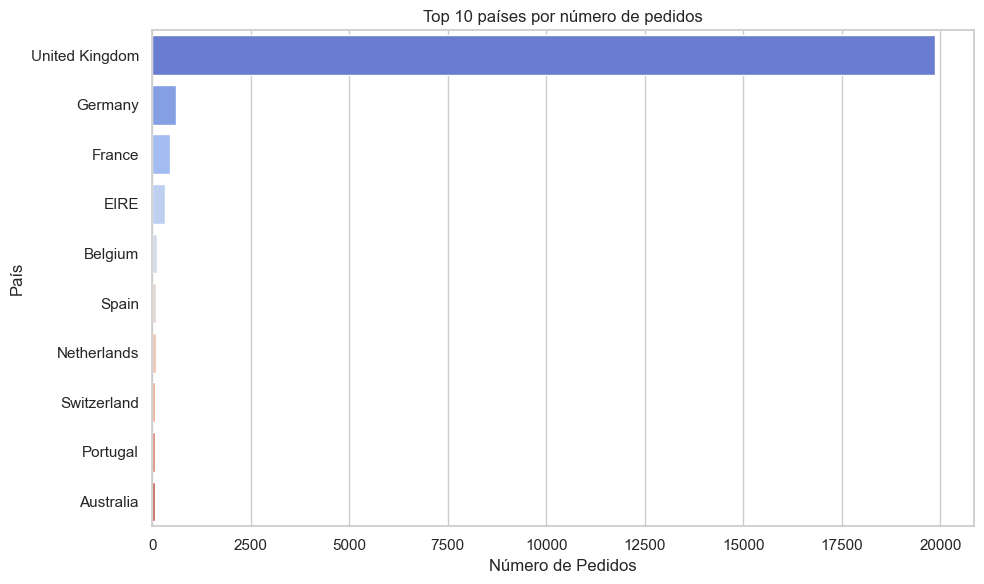

In [24]:
pedidos_por_pais = df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False).head(10)

sns.barplot(x=pedidos_por_pais.values, y=pedidos_por_pais.index, palette="coolwarm")
plt.title("Top 10 países por número de pedidos")
plt.xlabel("Número de Pedidos")
plt.ylabel("País")
plt.tight_layout()
plt.savefig("imagens/pedidos_por_pais.png", dpi=300)
plt.show()